In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [2]:
%matplotlib inline

In [24]:
df = pd.read_csv('train'+str(105)+'.csv').drop(columns=['index', 'Year', 'County Name', 'Township Name', 'Village Name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   c_marital                    1488 non-null   float64
 1   c_popcal_Population Density  1488 non-null   float64
 2   c_popcal_Natural Increase    1488 non-null   float64
 3   c_popcal_Social Increase     1488 non-null   float64
 4   h                            1488 non-null   float64
 5   j_income                     1488 non-null   float64
 6   j_edu_1                      1488 non-null   float64
 7   j_edu_2                      1488 non-null   float64
 8   ht_NO2                       1488 non-null   float64
 9   ht_PM2.5                     1488 non-null   float64
 10  e_Water                      1488 non-null   float64
 11  e_Green                      1488 non-null   float64
 12  cs_trans_Metro 300           1488 non-null   float64
 13  cs_trans_Metro 300

In [25]:
X = df.iloc[:, :-1]
result  = df.copy()
result

,c_marital,c_popcal_Population Density,c_popcal_Natural Increase,c_popcal_Social Increase,h,j_income,j_edu_1,j_edu_2,ht_NO2,ht_PM2.5,...,Township Name_信義區,Township Name_內湖區,Township Name_北投區,Township Name_南港區,Township Name_士林區,Township Name_大同區,Township Name_大安區,Township Name_文山區,Township Name_松山區,V_ID
0,0.007372,0.073178,0.142476,0.432381,0.199266,0.003103,0.009404,0.384841,0.426317,0.707496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-001
1,0.122752,0.033828,0.168192,0.472749,0.199266,0.046486,0.129028,0.562483,0.426317,0.707496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-004
2,0.195364,0.042684,0.155528,0.417153,0.199266,0.063100,0.205165,0.735271,0.426317,0.707496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-025
3,0.139490,0.014771,0.156749,0.435480,0.199266,0.048216,0.153890,0.603072,0.426317,0.863484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-026
4,0.035957,0.000538,0.130817,0.432381,0.199266,0.006993,0.034331,0.458627,0.426317,0.863484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,0.200159,0.237118,0.171371,0.419411,0.424721,0.082662,0.219002,0.596258,0.463742,0.373646,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63000070-025
1484,0.179248,0.199366,0.153043,0.423052,0.424721,0.085412,0.193256,0.501422,0.463742,0.373646,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63000070-012
1485,0.196124,0.124821,0.166009,0.414544,0.424721,0.083640,0.224624,0.633336,0.484821,0.544627,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63000070-006
1486,0.249004,0.266285,0.163775,0.422879,0.424721,0.110353,0.277706,0.599183,0.463742,0.373646,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63000070-011


# DBSCAN 

The main idea behind DBSCAN is to group data points that are closely packed together and separate them from regions of lower density. **The cluster size cannot be determined, and there will be a problem of no clustering**

In [98]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=2).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 278
Estimated number of noise points: 471


## Gaussian Mixture

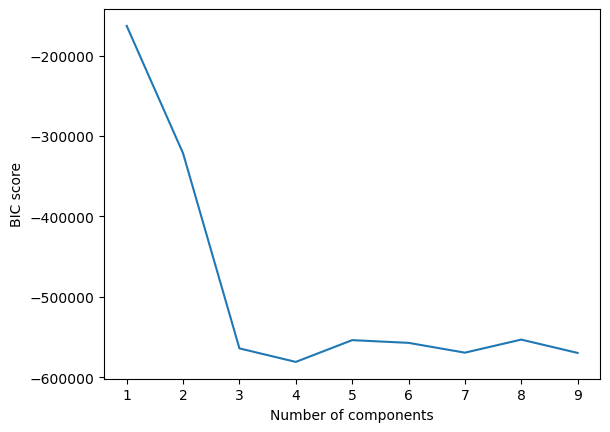

In [26]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

n_components_range = range(1, 10)
bic_scores = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))


import matplotlib.pyplot as plt

plt.plot(n_components_range, bic_scores)
plt.xlabel('Number of components')
plt.ylabel('BIC score')
plt.show()


In [27]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import normalize

gmm = GaussianMixture(n_components=4, init_params='kmeans', random_state=42)
gmm.fit(X)

means_init = gmm.means_
weights_init = gmm.weights_

best_gmm = None
best_score = -np.inf
for i in range(10):
    gmm = GaussianMixture(n_components=4, weights_init=weights_init,
                      means_init=means_init, random_state=42, )
    gmm.fit(X)
    score = gmm.score(X)
    if score > best_score:
        best_gmm = gmm
        best_score = score
    means_init = best_gmm.means_
    weights_init = best_gmm.weights_
    
result['GM_4'] = best_gmm.predict(X)

In [28]:
result['GM_4'] = best_gmm.predict(X)

result

,c_marital,c_popcal_Population Density,c_popcal_Natural Increase,c_popcal_Social Increase,h,j_income,j_edu_1,j_edu_2,ht_NO2,ht_PM2.5,...,Township Name_內湖區,Township Name_北投區,Township Name_南港區,Township Name_士林區,Township Name_大同區,Township Name_大安區,Township Name_文山區,Township Name_松山區,V_ID,GM_4
0,0.007372,0.073178,0.142476,0.432381,0.199266,0.003103,0.009404,0.384841,0.426317,0.707496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-001,3
1,0.122752,0.033828,0.168192,0.472749,0.199266,0.046486,0.129028,0.562483,0.426317,0.707496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-004,3
2,0.195364,0.042684,0.155528,0.417153,0.199266,0.063100,0.205165,0.735271,0.426317,0.707496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-025,3
3,0.139490,0.014771,0.156749,0.435480,0.199266,0.048216,0.153890,0.603072,0.426317,0.863484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-026,3
4,0.035957,0.000538,0.130817,0.432381,0.199266,0.006993,0.034331,0.458627,0.426317,0.863484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-014,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,0.200159,0.237118,0.171371,0.419411,0.424721,0.082662,0.219002,0.596258,0.463742,0.373646,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63000070-025,0
1484,0.179248,0.199366,0.153043,0.423052,0.424721,0.085412,0.193256,0.501422,0.463742,0.373646,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63000070-012,0
1485,0.196124,0.124821,0.166009,0.414544,0.424721,0.083640,0.224624,0.633336,0.484821,0.544627,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63000070-006,0
1486,0.249004,0.266285,0.163775,0.422879,0.424721,0.110353,0.277706,0.599183,0.463742,0.373646,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63000070-011,0


In [29]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import normalize

gmm = GaussianMixture(n_components=7, init_params='kmeans', random_state=42)
gmm.fit(X)

means_init = gmm.means_
weights_init = gmm.weights_

best_gmm = None
best_score = -np.inf
for i in range(10):
    gmm = GaussianMixture(n_components=7, weights_init=weights_init,
                      means_init=means_init, random_state=42, )
    gmm.fit(X)
    score = gmm.score(X)
    if score > best_score:
        best_gmm = gmm
        best_score = score
    means_init = best_gmm.means_
    weights_init = best_gmm.weights_

In [30]:
result['GM_7'] = best_gmm.predict(X)

result

,c_marital,c_popcal_Population Density,c_popcal_Natural Increase,c_popcal_Social Increase,h,j_income,j_edu_1,j_edu_2,ht_NO2,ht_PM2.5,...,Township Name_北投區,Township Name_南港區,Township Name_士林區,Township Name_大同區,Township Name_大安區,Township Name_文山區,Township Name_松山區,V_ID,GM_4,GM_7
0,0.007372,0.073178,0.142476,0.432381,0.199266,0.003103,0.009404,0.384841,0.426317,0.707496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-001,3,3
1,0.122752,0.033828,0.168192,0.472749,0.199266,0.046486,0.129028,0.562483,0.426317,0.707496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-004,3,3
2,0.195364,0.042684,0.155528,0.417153,0.199266,0.063100,0.205165,0.735271,0.426317,0.707496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-025,3,3
3,0.139490,0.014771,0.156749,0.435480,0.199266,0.048216,0.153890,0.603072,0.426317,0.863484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-026,3,3
4,0.035957,0.000538,0.130817,0.432381,0.199266,0.006993,0.034331,0.458627,0.426317,0.863484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-014,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,0.200159,0.237118,0.171371,0.419411,0.424721,0.082662,0.219002,0.596258,0.463742,0.373646,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63000070-025,0,6
1484,0.179248,0.199366,0.153043,0.423052,0.424721,0.085412,0.193256,0.501422,0.463742,0.373646,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63000070-012,0,4
1485,0.196124,0.124821,0.166009,0.414544,0.424721,0.083640,0.224624,0.633336,0.484821,0.544627,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63000070-006,0,0
1486,0.249004,0.266285,0.163775,0.422879,0.424721,0.110353,0.277706,0.599183,0.463742,0.373646,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63000070-011,0,4


# KMEANS

# all features

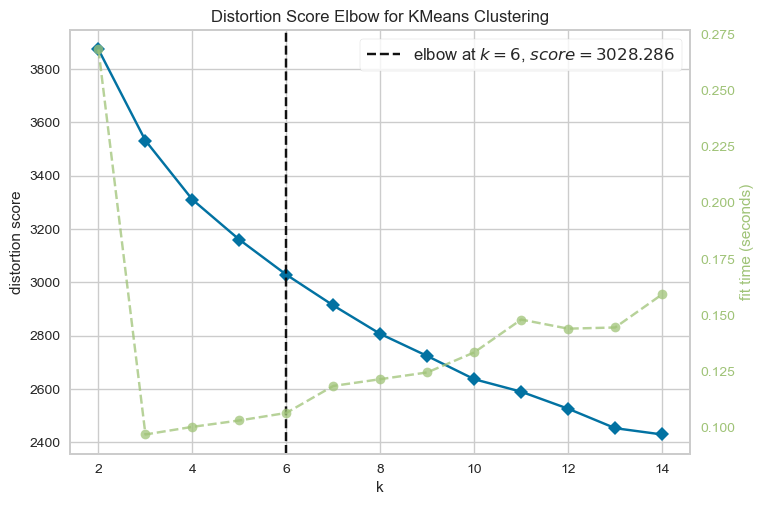

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
#inertia ref https://www.scikit-yb.org/en/latest/api/cluster
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [6]:
n_clusters = range(3,15)
silhouette_scores = []

for k in n_clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    silhouette_scores.append(silhouette_score(X, model.labels_))
silhouette_scores = pd.DataFrame(silhouette_scores)

<AxesSubplot:xlabel='n_clusters', ylabel='0'>

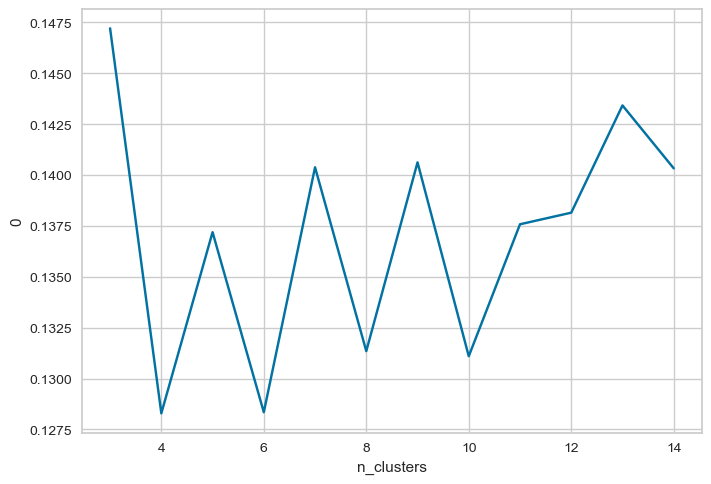

In [198]:
silhouette_scores['n_clusters'] = silhouette_scores.index+3
sns.lineplot(data=silhouette_scores, x='n_clusters', y=0)

In [147]:
silhouette_scores

,0,n_clusters
0,0.146428,2
1,0.127398,3
2,0.137990,4
3,0.147726,5
4,0.140992,6
5,0.141612,7
6,0.137380,8
7,0.140307,9
8,0.148405,10
9,0.141627,11


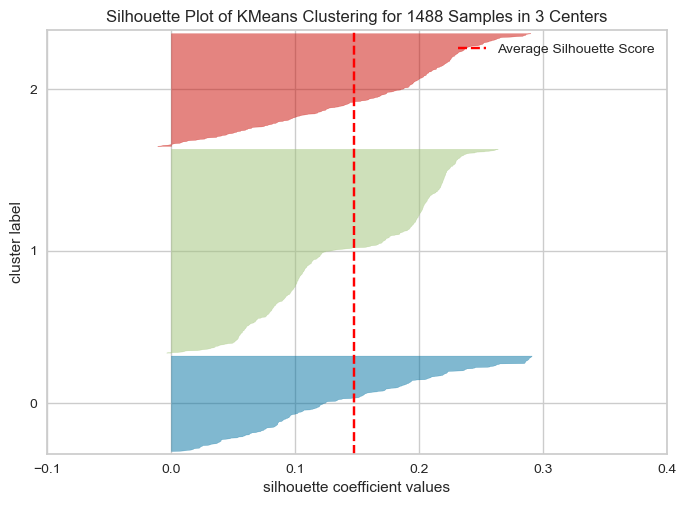

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1488 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [201]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

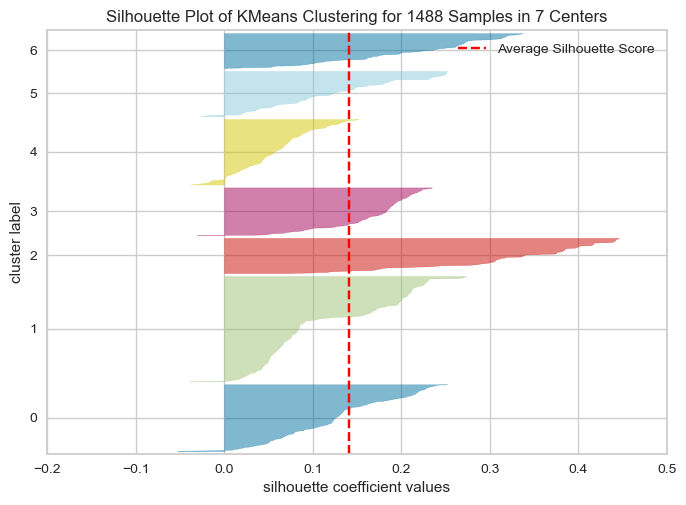

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1488 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [7]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(7, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

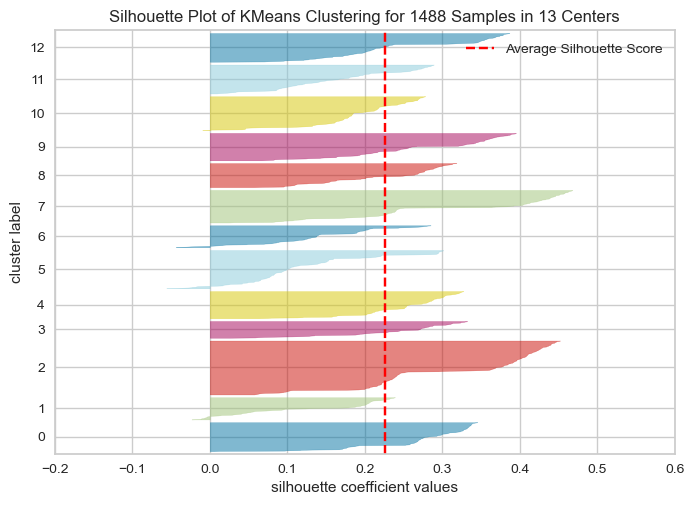

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1488 Samples in 13 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [210]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(13, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [225]:
# Build model
n = 3
final_model = KMeans(n_clusters=n, random_state=42)
# Fit model to data
final_model.fit(X)
labels = final_model.labels_
db = davies_bouldin_score(X, labels)
print("db index:", db)
result['kmeans_'+str(n)] = list(final_model.predict(X))
result

db index: 2.1672335389445228


,c_marital,c_popcal_Population Density,c_popcal_Natural Increase,c_popcal_Social Increase,h,j_income,j_edu_1,j_edu_2,ht_NO2,ht_PM2.5,...,Township Name_北投區,Township Name_南港區,Township Name_士林區,Township Name_大同區,Township Name_大安區,Township Name_文山區,Township Name_松山區,V_ID,kmeans_7,kmeans_3
0,0.007372,0.073178,0.142476,0.432381,0.199266,0.003103,0.009404,0.384841,0.426317,0.707496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-001,1,1
1,0.122752,0.033828,0.168192,0.472749,0.199266,0.046486,0.129028,0.562483,0.426317,0.707496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-004,1,1
2,0.195364,0.042684,0.155528,0.417153,0.199266,0.063100,0.205165,0.735271,0.426317,0.707496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-025,1,1
3,0.139490,0.014771,0.156749,0.435480,0.199266,0.048216,0.153890,0.603072,0.426317,0.863484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-026,0,1
4,0.035957,0.000538,0.130817,0.432381,0.199266,0.006993,0.034331,0.458627,0.426317,0.863484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000090-014,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,0.200159,0.237118,0.171371,0.419411,0.424721,0.082662,0.219002,0.596258,0.463742,0.373646,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63000070-025,1,1
1484,0.179248,0.199366,0.153043,0.423052,0.424721,0.085412,0.193256,0.501422,0.463742,0.373646,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63000070-012,3,2
1485,0.196124,0.124821,0.166009,0.414544,0.424721,0.083640,0.224624,0.633336,0.484821,0.544627,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63000070-006,4,2
1486,0.249004,0.266285,0.163775,0.422879,0.424721,0.110353,0.277706,0.599183,0.463742,0.373646,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63000070-011,3,2


In [22]:
# Build model
n = 7
final_model = KMeans(n_clusters=n, random_state=42)
# Fit model to data
final_model.fit(X)
labels = final_model.labels_
db = davies_bouldin_score(X, labels)
print("db index:", db)
result['kmeans_'+str(n)] = list(final_model.predict(X))
result

db index: 2.2187500594449228


,c_marital,c_popcal_Population Density,c_popcal_Natural Increase,c_popcal_Social Increase,h,j_income,j_edu_1,j_edu_2,ht_NO2,ht_PM2.5,...,Township Name_南港區,Township Name_士林區,Township Name_大同區,Township Name_大安區,Township Name_文山區,Township Name_松山區,V_ID,GM_4,GM_7,kmeans_7
0,0.006479,0.078739,0.163000,0.113749,0.193649,0.002535,0.008006,0.379215,0.087151,0.541697,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-001,3,5,4
1,0.108768,0.039914,0.190574,0.127951,0.193649,0.043813,0.106958,0.540699,0.087151,0.541697,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-004,3,5,4
2,0.152930,0.043728,0.179715,0.111903,0.193649,0.046551,0.148105,0.671120,0.087151,0.564872,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-025,3,5,4
3,0.112955,0.015230,0.178285,0.111110,0.193649,0.035566,0.112281,0.574550,0.079738,0.595874,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-026,3,5,5
4,0.027728,0.000504,0.140115,0.113066,0.193649,0.004072,0.023325,0.441200,0.087151,0.626988,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-014,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,0.155362,0.236451,0.154633,0.105859,0.334884,0.062601,0.153745,0.568822,0.100693,0.619199,...,0.0,0.0,0.0,0.0,0.0,0.0,63000070-025,3,3,4
1484,0.135148,0.193873,0.152897,0.106305,0.334884,0.068493,0.135705,0.460230,0.100693,0.713125,...,0.0,0.0,0.0,0.0,0.0,0.0,63000070-012,0,6,1
1485,0.158483,0.127259,0.126143,0.113523,0.334884,0.068141,0.157863,0.596670,0.094126,0.713125,...,0.0,0.0,0.0,0.0,0.0,0.0,63000070-006,0,6,1
1486,0.188129,0.256663,0.166206,0.097829,0.334884,0.084177,0.186016,0.560815,0.112714,0.823925,...,0.0,0.0,0.0,0.0,0.0,0.0,63000070-011,0,6,1


In [226]:
# Build model
n = 13
final_model = KMeans(n_clusters=n, random_state=42)
# Fit model to data
final_model.fit(X)
labels = final_model.labels_
db = davies_bouldin_score(X, labels)
print("db index:", db)
result['kmeans_'+str(n)] = list(final_model.predict(X))
result

db index: 2.190854110349712


,c_marital,c_popcal_Population Density,c_popcal_Natural Increase,c_popcal_Social Increase,h,j_income,j_edu_1,j_edu_2,ht_NO2,ht_PM2.5,...,Township Name_南港區,Township Name_士林區,Township Name_大同區,Township Name_大安區,Township Name_文山區,Township Name_松山區,V_ID,kmeans_7,kmeans_3,kmeans_13
0,0.007372,0.073178,0.142476,0.432381,0.199266,0.003103,0.009404,0.384841,0.426317,0.707496,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-001,1,1,10
1,0.122752,0.033828,0.168192,0.472749,0.199266,0.046486,0.129028,0.562483,0.426317,0.707496,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-004,1,1,10
2,0.195364,0.042684,0.155528,0.417153,0.199266,0.063100,0.205165,0.735271,0.426317,0.707496,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-025,1,1,10
3,0.139490,0.014771,0.156749,0.435480,0.199266,0.048216,0.153890,0.603072,0.426317,0.863484,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-026,0,1,6
4,0.035957,0.000538,0.130817,0.432381,0.199266,0.006993,0.034331,0.458627,0.426317,0.863484,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-014,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,0.200159,0.237118,0.171371,0.419411,0.424721,0.082662,0.219002,0.596258,0.463742,0.373646,...,0.0,0.0,0.0,0.0,0.0,0.0,63000070-025,1,1,1
1484,0.179248,0.199366,0.153043,0.423052,0.424721,0.085412,0.193256,0.501422,0.463742,0.373646,...,0.0,0.0,0.0,0.0,0.0,0.0,63000070-012,3,2,8
1485,0.196124,0.124821,0.166009,0.414544,0.424721,0.083640,0.224624,0.633336,0.484821,0.544627,...,0.0,0.0,0.0,0.0,0.0,0.0,63000070-006,4,2,7
1486,0.249004,0.266285,0.163775,0.422879,0.424721,0.110353,0.277706,0.599183,0.463742,0.373646,...,0.0,0.0,0.0,0.0,0.0,0.0,63000070-011,3,2,8


# no city and county

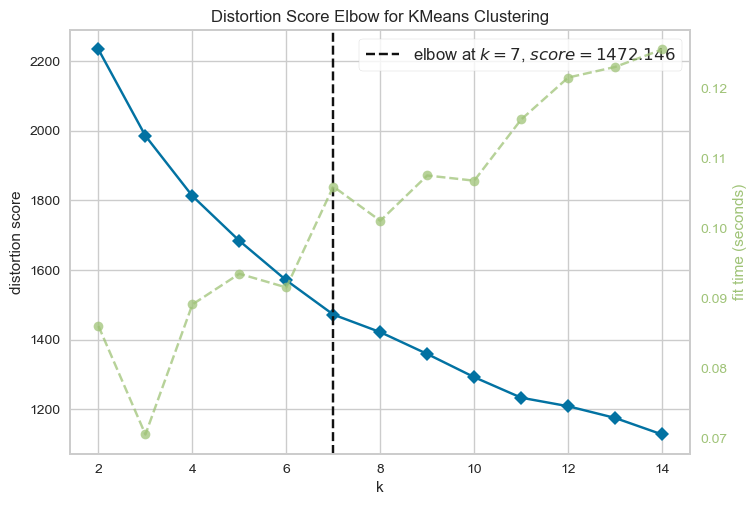

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [205]:
X = df.iloc[:,:24]
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [206]:
n_clusters = range(2,15)
silhouette_scores = []

for k in n_clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    silhouette_scores.append(silhouette_score(X, model.labels_))
silhouette_scores = pd.DataFrame(silhouette_scores)

<AxesSubplot:xlabel='n_clusters', ylabel='0'>

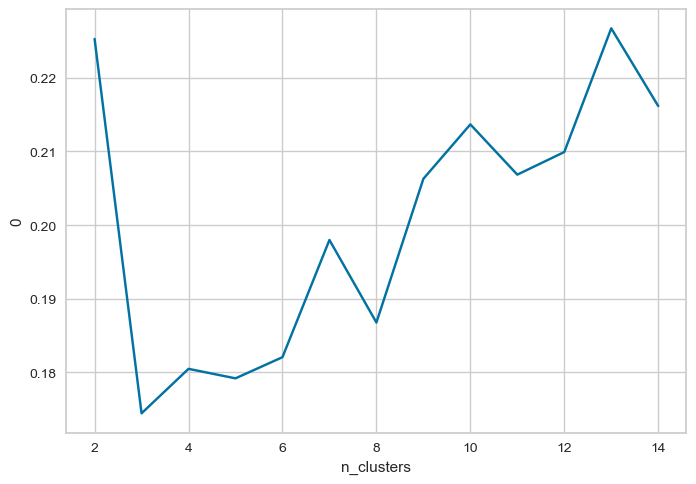

In [207]:
silhouette_scores['n_clusters'] = silhouette_scores.index+2
sns.lineplot(data=silhouette_scores, x='n_clusters', y=0)

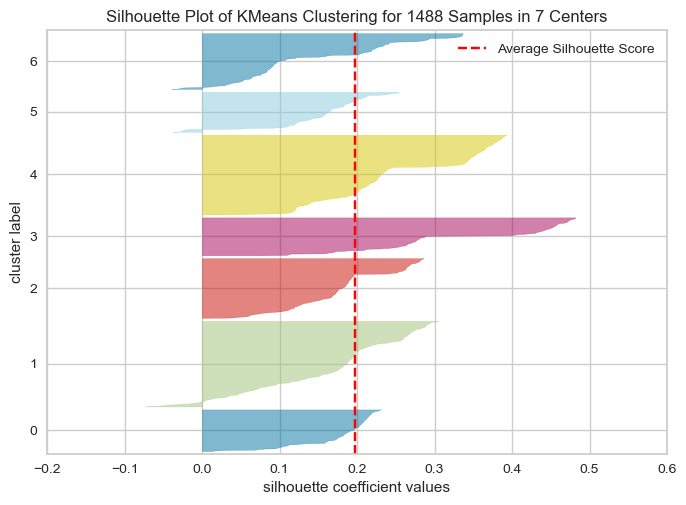

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1488 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [208]:
# Instantiate the clustering model and visualizer
model = KMeans(7, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

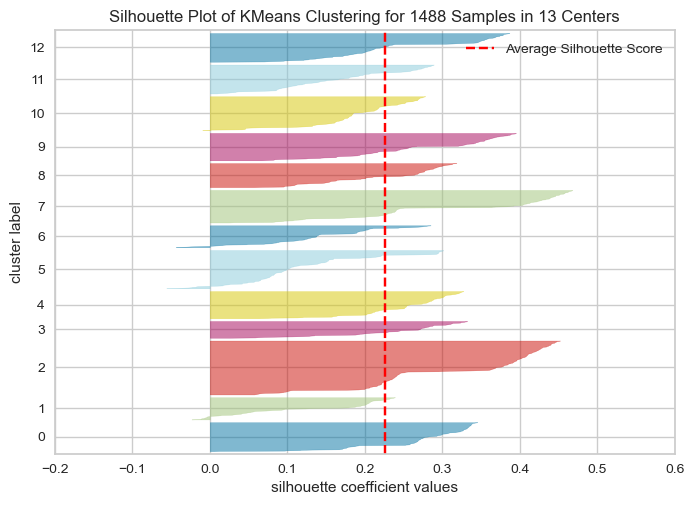

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1488 Samples in 13 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [209]:
# Instantiate the clustering model and visualizer
model = KMeans(13, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [212]:
# Build model
n = 7
final_model = KMeans(n_clusters=n, random_state=42)
# Fit model to data
final_model.fit(X)
labels = final_model.labels_
db = davies_bouldin_score(X, labels)
print("db index:", db)

#result['kmeans_nocity&county_'+str(n)] = list(final_model.predict(X))
result

db index: 1.7273283813271798


,c_marital,c_popcal_Population Density,c_popcal_Natural Increase,c_popcal_Social Increase,h,j_income,j_edu_1,j_edu_2,ht_NO2,ht_PM2.5,...,Township Name_南港區,Township Name_士林區,Township Name_大同區,Township Name_大安區,Township Name_文山區,Township Name_松山區,V_ID,kmeans_3,kmeans_7,kmeans_13
0,0.007372,0.073178,0.142476,0.432381,0.199266,0.003103,0.009404,0.384841,0.426317,0.707496,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-001,1,1,2
1,0.122752,0.033828,0.168192,0.472749,0.199266,0.046486,0.129028,0.562483,0.426317,0.707496,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-004,1,1,2
2,0.195364,0.042684,0.155528,0.417153,0.199266,0.063100,0.205165,0.735271,0.426317,0.707496,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-025,1,1,2
3,0.139490,0.014771,0.156749,0.435480,0.199266,0.048216,0.153890,0.603072,0.426317,0.863484,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-026,1,0,4
4,0.035957,0.000538,0.130817,0.432381,0.199266,0.006993,0.034331,0.458627,0.426317,0.863484,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-014,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,0.200159,0.237118,0.171371,0.419411,0.424721,0.082662,0.219002,0.596258,0.463742,0.373646,...,0.0,0.0,0.0,0.0,0.0,0.0,63000070-025,1,1,1
1484,0.179248,0.199366,0.153043,0.423052,0.424721,0.085412,0.193256,0.501422,0.463742,0.373646,...,0.0,0.0,0.0,0.0,0.0,0.0,63000070-012,2,3,12
1485,0.196124,0.124821,0.166009,0.414544,0.424721,0.083640,0.224624,0.633336,0.484821,0.544627,...,0.0,0.0,0.0,0.0,0.0,0.0,63000070-006,2,4,6
1486,0.249004,0.266285,0.163775,0.422879,0.424721,0.110353,0.277706,0.599183,0.463742,0.373646,...,0.0,0.0,0.0,0.0,0.0,0.0,63000070-011,2,3,12


# No city

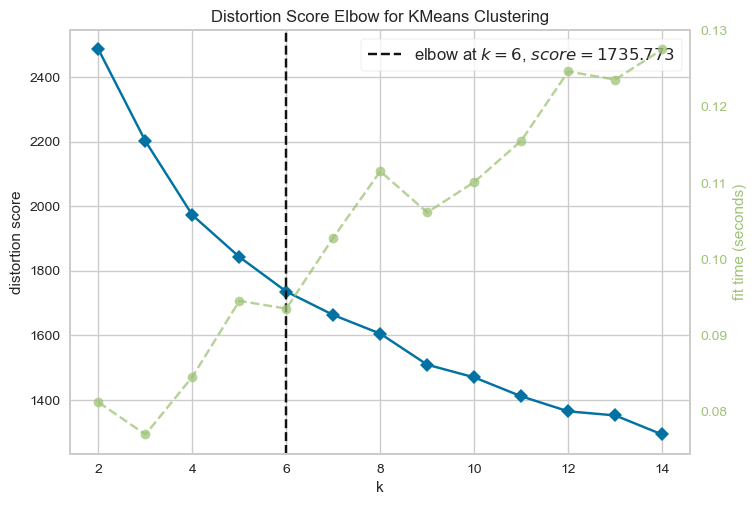

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [213]:
X = df.iloc[:,:25]
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [214]:
n_clusters = range(2,15)
silhouette_scores = []

for k in n_clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    silhouette_scores.append(silhouette_score(X, model.labels_))
silhouette_scores = pd.DataFrame(silhouette_scores)

<AxesSubplot:xlabel='n_clusters', ylabel='0'>

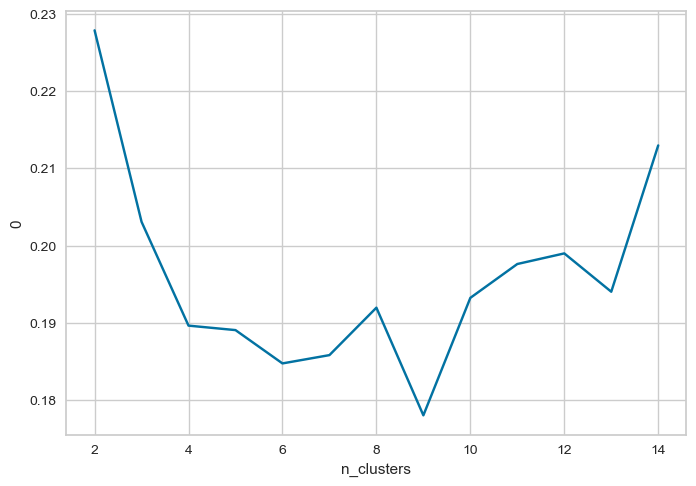

In [215]:
silhouette_scores['n_clusters'] = silhouette_scores.index+2
sns.lineplot(data=silhouette_scores, x='n_clusters', y=0)

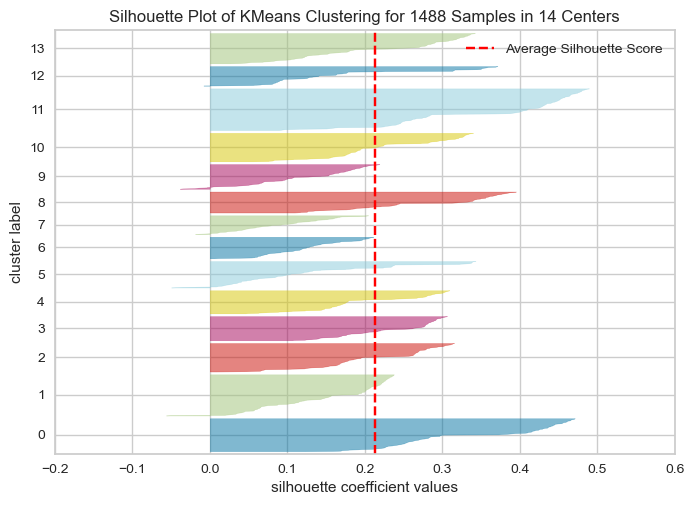

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1488 Samples in 14 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [216]:
# Instantiate the clustering model and visualizer
model = KMeans(14, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

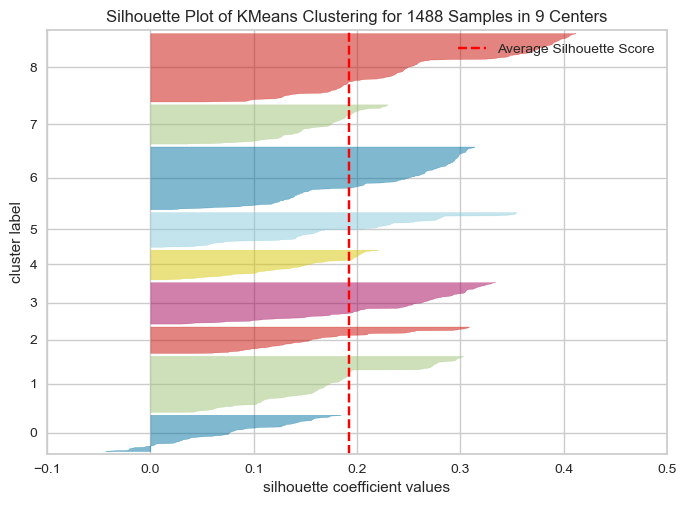

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1488 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [175]:
# Instantiate the clustering model and visualizer
model = KMeans(9, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [187]:
# Build model
n = 9
final_model = KMeans(n_clusters=n, random_state=42)
# Fit model to data
final_model.fit(X)
labels = final_model.labels_
db = davies_bouldin_score(X, labels)
print("db index:", db)

result['kmeans_nocity_'+str(n)] = list(final_model.predict(X))
result

db index: 1.838843057336584


,c_ratio,c_marital,c_popcal_Population Density,c_popcal_Natural Increase,c_popcal_Social Increase,h,j_income,j_edu_1,j_edu_2,ht_NO2,...,Township Name_南港區,Township Name_士林區,Township Name_大同區,Township Name_大安區,Township Name_文山區,Township Name_松山區,V_ID,kmeans_6,kmeans_nocity&county_7,kmeans_nocity_9
0,0.101885,0.007372,0.073178,0.142476,0.432381,0.199266,0.003103,0.009404,0.384841,0.426317,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-001,5,4,8
1,0.017298,0.122752,0.033828,0.168192,0.472749,0.199266,0.046486,0.129028,0.562483,0.426317,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-004,5,4,8
2,0.031828,0.195364,0.042684,0.155528,0.417153,0.199266,0.063100,0.205165,0.735271,0.426317,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-025,5,4,8
3,0.038812,0.139490,0.014771,0.156749,0.435480,0.199266,0.048216,0.153890,0.603072,0.426317,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-026,2,5,6
4,0.173927,0.035957,0.000538,0.130817,0.432381,0.199266,0.006993,0.034331,0.458627,0.426317,...,0.0,0.0,0.0,0.0,0.0,0.0,65000090-014,2,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,0.089763,0.200159,0.237118,0.171371,0.419411,0.424721,0.082662,0.219002,0.596258,0.463742,...,0.0,0.0,0.0,0.0,0.0,0.0,63000070-025,5,4,4
1484,0.059908,0.179248,0.199366,0.153043,0.423052,0.424721,0.085412,0.193256,0.501422,0.463742,...,0.0,0.0,0.0,0.0,0.0,0.0,63000070-012,0,2,3
1485,0.130174,0.196124,0.124821,0.166009,0.414544,0.424721,0.083640,0.224624,0.633336,0.484821,...,0.0,0.0,0.0,0.0,0.0,0.0,63000070-006,0,0,7
1486,0.091225,0.249004,0.266285,0.163775,0.422879,0.424721,0.110353,0.277706,0.599183,0.463742,...,0.0,0.0,0.0,0.0,0.0,0.0,63000070-011,0,2,3


# First level Clustering

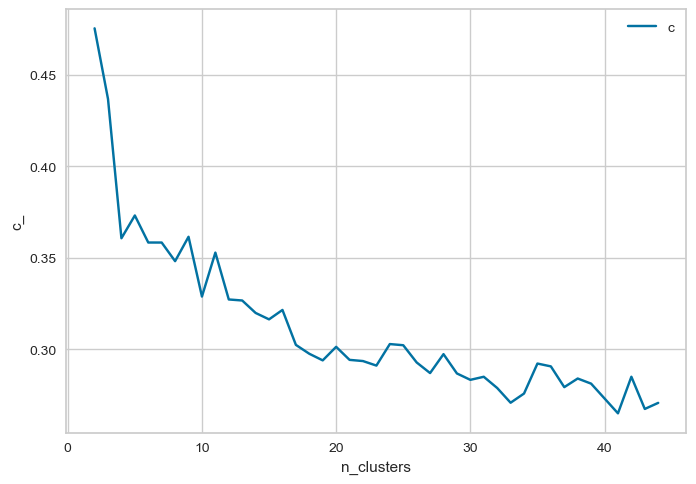

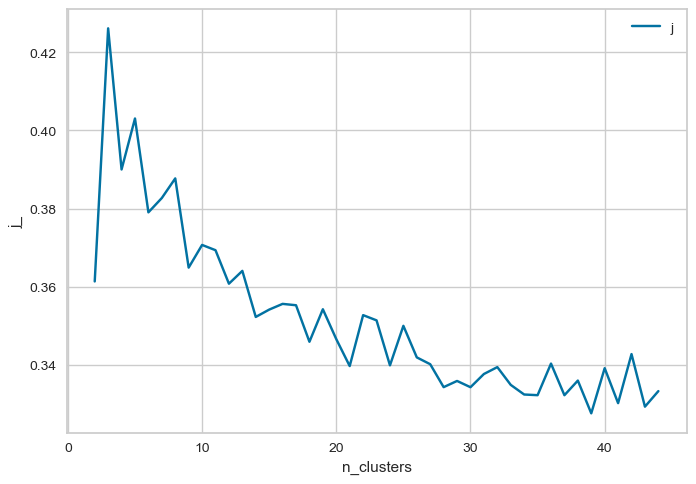

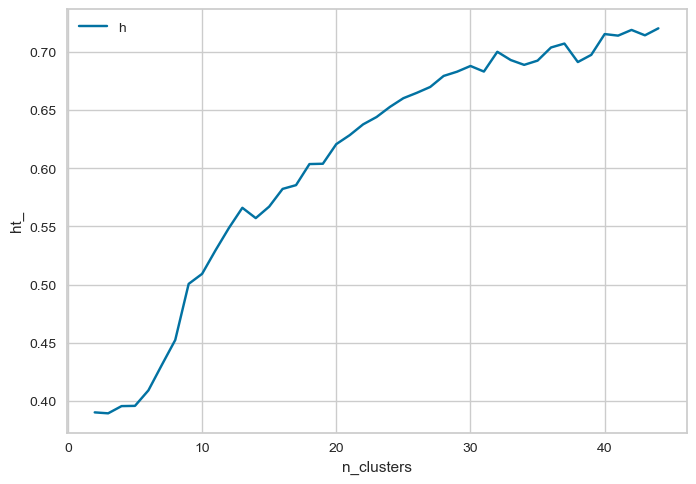

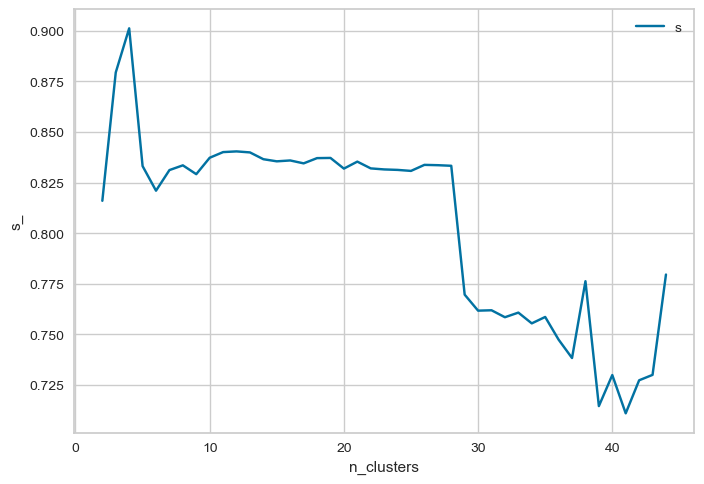

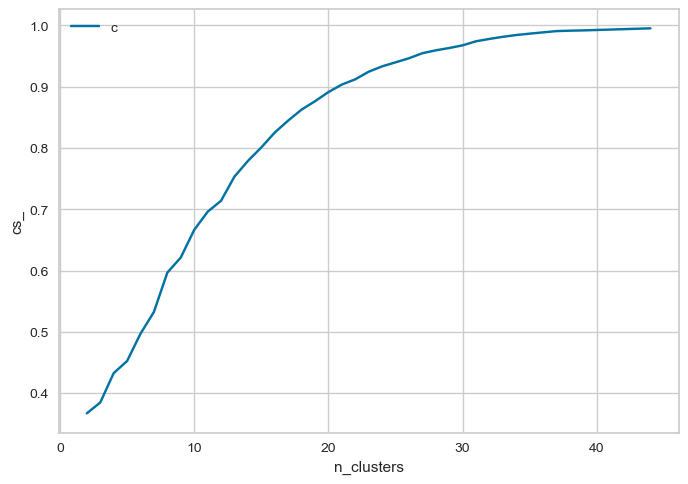

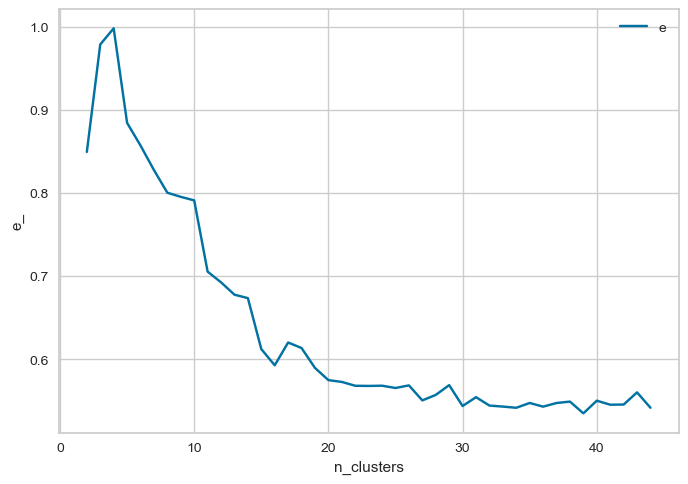

In [217]:
flt = ['c_', 'j_', 'ht_', 's_', 'cs_', 'e_']
for i in  flt:
    df1 = df.filter(regex='^'+i)
    n_clusters = range(2,45)
    silhouette_scores = []
    X = df1
    for k in n_clusters:
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(X)
        silhouette_scores.append(silhouette_score(X, model.labels_))
    if i == 'c_':
        silhouette = pd.DataFrame(data=silhouette_scores, index=None, columns=[i])
        silhouette['n_clusters'] = silhouette.index+2
    else:
        silhouette[i] = list(silhouette_scores)

    
    sns.lineplot(data=silhouette, x='n_clusters', y=i)
    plt.legend(i)
    plt.show()

In [178]:
#24 21 2 3 2 16
#2 3 14 4 15 4
silhouette
flt = ['c_', 'j_', 'ht_', 's_', 'cs_', 'e_']

In [190]:
cltNum = {'c_':2, 'j_':3, 'ht_':14, 's_':4, 'cs_':15, 'e_':4}
for i in  flt:
    df1 = df.filter(regex='^'+i)

    X = df1
    final_model = KMeans(n_clusters=cltNum[i], random_state=42)
    # Fit model to data
    final_model.fit(X)
    labels = final_model.labels_
    db = davies_bouldin_score(X, labels)
    print(i+" db index:", db)
    result[i] = list(final_model.predict(X))
result

c_ db index: 0.957723251859668
j_ db index: 0.7956768505657994
ht_ db index: 0.6484912975096108
s_ db index: 0.13901309709570553
cs_ db index: 0.5884185771500546
e_ db index: 0.004364442992276662


,c_ratio,c_marital,c_popcal_Population Density,c_popcal_Natural Increase,c_popcal_Social Increase,h,j_income,j_edu_1,j_edu_2,ht_NO2,...,V_ID,kmeans_6,kmeans_nocity&county_7,kmeans_nocity_9,c_,j_,ht_,s_,cs_,e_
0,0.101885,0.007372,0.073178,0.142476,0.432381,0.199266,0.003103,0.009404,0.384841,0.426317,...,65000090-001,5,4,8,1,1,12,0,3,0
1,0.017298,0.122752,0.033828,0.168192,0.472749,0.199266,0.046486,0.129028,0.562483,0.426317,...,65000090-004,5,4,8,1,1,12,0,3,0
2,0.031828,0.195364,0.042684,0.155528,0.417153,0.199266,0.063100,0.205165,0.735271,0.426317,...,65000090-025,5,4,8,1,2,4,0,3,0
3,0.038812,0.139490,0.014771,0.156749,0.435480,0.199266,0.048216,0.153890,0.603072,0.426317,...,65000090-026,2,5,6,1,2,4,1,0,0
4,0.173927,0.035957,0.000538,0.130817,0.432381,0.199266,0.006993,0.034331,0.458627,0.426317,...,65000090-014,2,5,6,1,1,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,0.089763,0.200159,0.237118,0.171371,0.419411,0.424721,0.082662,0.219002,0.596258,0.463742,...,63000070-025,5,4,4,0,2,2,0,3,2
1484,0.059908,0.179248,0.199366,0.153043,0.423052,0.424721,0.085412,0.193256,0.501422,0.463742,...,63000070-012,0,2,3,0,1,10,0,6,1
1485,0.130174,0.196124,0.124821,0.166009,0.414544,0.424721,0.083640,0.224624,0.633336,0.484821,...,63000070-006,0,0,7,1,2,8,0,7,2
1486,0.091225,0.249004,0.266285,0.163775,0.422879,0.424721,0.110353,0.277706,0.599183,0.463742,...,63000070-011,0,2,3,0,2,10,0,6,1


In [180]:
result.iloc[:,-10:].to_csv('0804_105.csv')

In [23]:
result.iloc[:,-4:].to_csv('0829_109.csv')